<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter6/Chapter6_7_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. scikit-learn의 tree.DecisionTreeClassifier

독일 신용데이터를 통해 결정트리 분류분석을 수행해보자

In [ ]:
import pandas as pd

credit = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/credit_final.csv")
credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

In [ ]:
credit['credit.rating'].unique()

array([1, 0])

In [ ]:
feature_columns = list(credit.columns.difference(['credit.rating']))
# X = credit.iloc[:,1:]
X = credit[feature_columns]
y = credit['credit.rating']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify = y, random_state = 1)
print(X_train.shape)

(700, 20)


In [ ]:
# DecisionTreeClassifier로 학습시켜보자
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

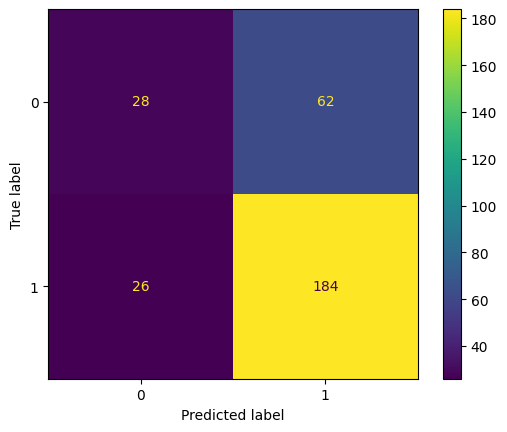

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(X_test)

acc = accuracy_score(y_test, pred)
print('정확도 \t{}%'.format(round(acc*100,2)))
prc = precision_score(y_test, pred)
print('정밀도 \t{}%'.format(round(prc*100,2)))

정확도 	70.67%
정밀도 	74.8%


In [ ]:
# classification_report를 통해 결정트리의 분석결과를 확인해보자.

from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.52      0.31      0.39        90
           1       0.75      0.88      0.81       210

    accuracy                           0.71       300
   macro avg       0.63      0.59      0.60       300
weighted avg       0.68      0.71      0.68       300



ROC_AUC_score :  0.7221428571428572


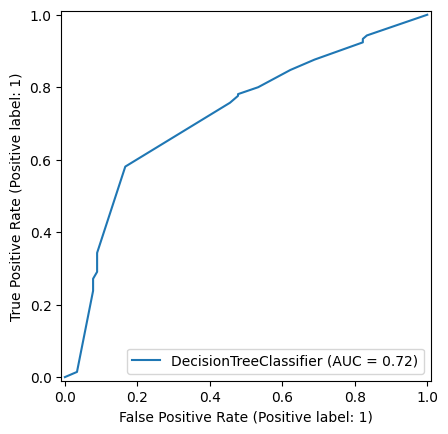

In [ ]:
# 예측결과를 ROC 곡선으로 시각화한 뒤 ROC 곡선의 면적을 계산해보자
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score

RocCurveDisplay.from_estimator(clf, X_test, y_test)

R_A_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print("ROC_AUC_score : ",R_A_score)

In [ ]:
# 트리를 생성하는 데 있어 중요한 변수가 무엇인지 확인하기 위해 변수중요도를 확인해보자
importances = clf.feature_importances_
column_nm = pd.DataFrame(X.columns)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis =1)
feature_importances.columns = ['feature_nm', 'importances']
feature_importances

,feature_nm,importances
0,account.balance,0.263282
1,age,0.097293
2,apartment.type,0.045708
3,bank.credits,0.000000
4,credit.amount,0.086741
5,credit.duration.months,0.187908
6,credit.purpose,0.059083
7,current.assets,0.000000
8,dependents,0.000000
9,employment.duration,0.000000


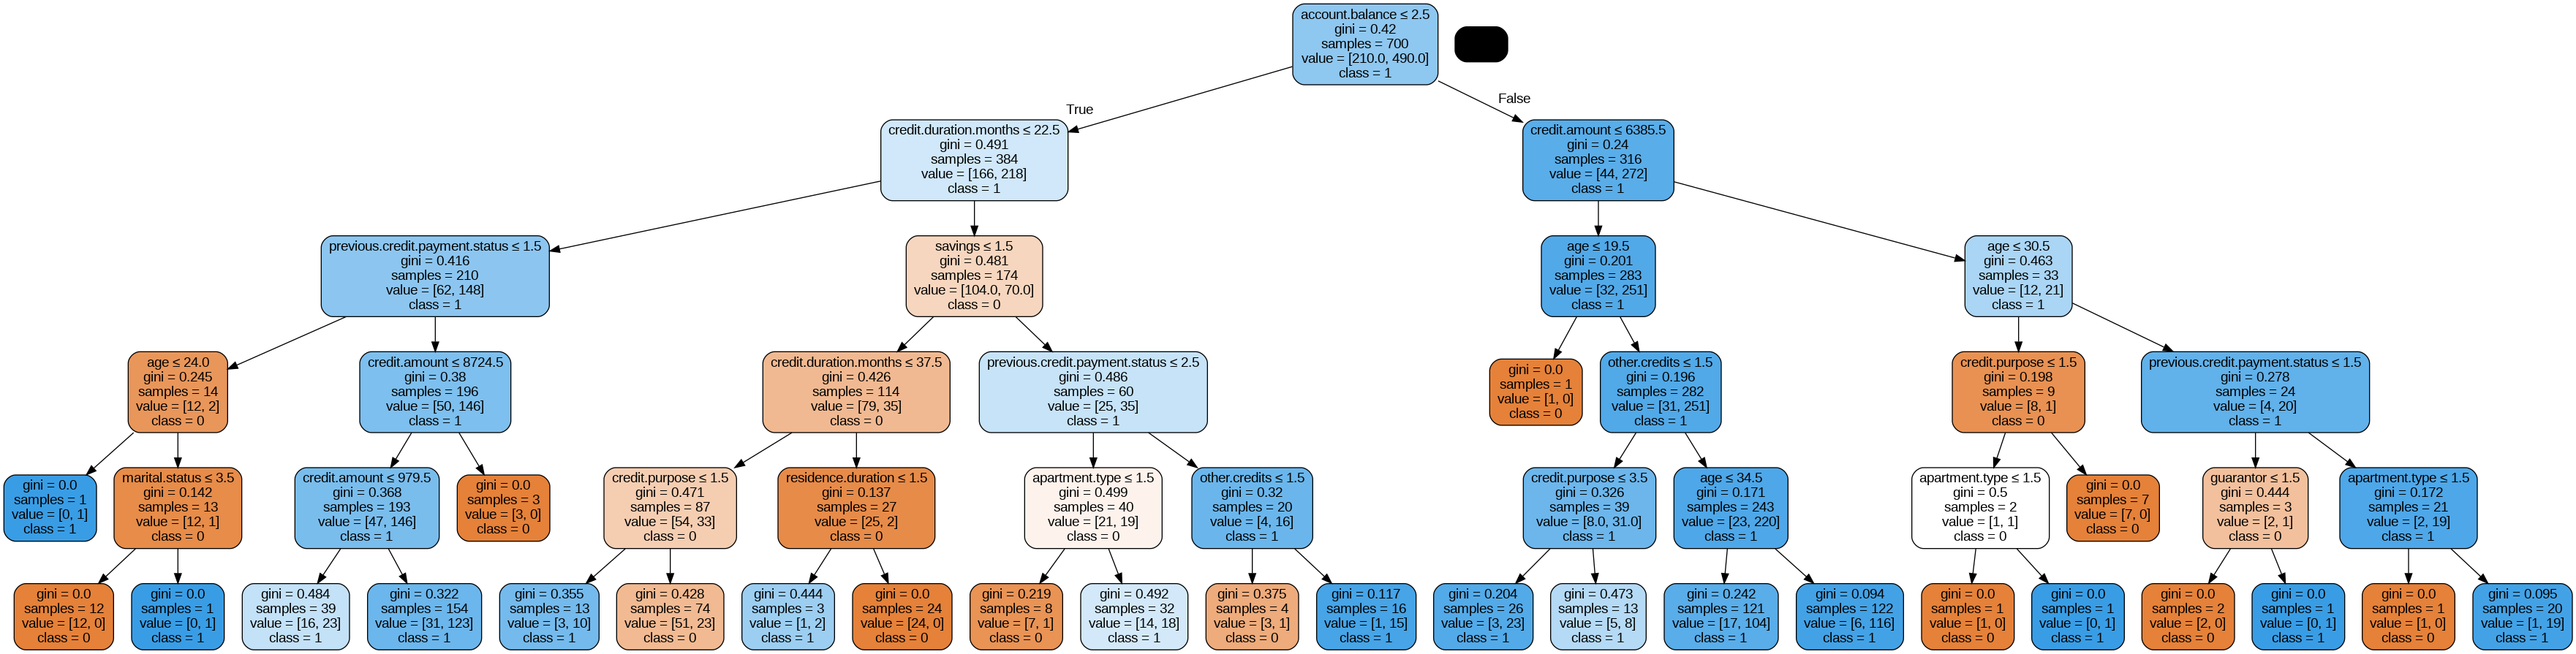

In [ ]:
# 의사결정트리의 분류 의사결정을 시각화해보자. Graphviz로 결정트리를 시각화할 수 있다.
import numpy as np
feature_names = feature_columns
target_names = np.array(['0','1'])

import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
dt_dot_data = export_graphviz(clf, feature_names = feature_names,
                              class_names = target_names,
                              filled= True, rounded = True,
                              special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

from IPython.display import Image
Image(dt_graph.create_png())

# 2. scikit-learn의 tree.DecisionTreeRegressor

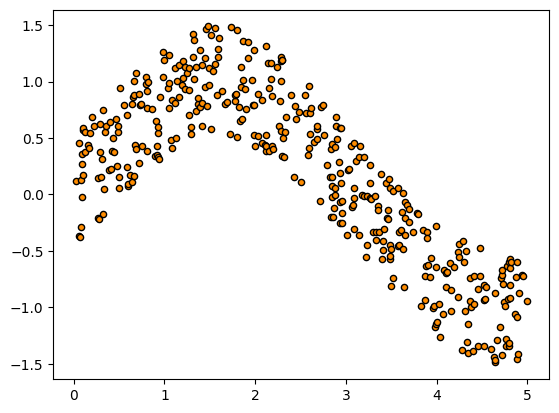

In [45]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.sort(5 * np.random.rand(400,1), axis = 0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# 노이즈 추가하기
y[::1] += 1 * (0.5 - np.random.rand(400))
plt.scatter(X, y, s = 20, edgecolor = 'black', c = 'darkorange', label = 'data')


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


In [47]:
regr_1 = DecisionTreeRegressor(max_depth = 2)
regr_2 = DecisionTreeRegressor(max_depth = 5)

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_1 = regr_1.fit(X_train, y_train).predict(X_test)
y_2 = regr_2.fit(X_train, y_train).predict(X_test)

preds = [y_1, y_2]
weights = ["max depth = 2", "max depth = 5"]
evls = ['mse', 'rmse', 'mae']
results = pd.DataFrame(index = weights, columns = evls)

for pred, nm in zip(preds, weights):
  mse = mean_squared_error(y_test, pred)
  mae = mean_absolute_error(y_test, pred)
  rmse = np.sqrt(mse)

  results.loc[nm, 'mse'] = round(mse,2)
  results.loc[nm,'rmse'] = round(rmse,2)
  results.loc[nm,'mae'] = round(mae,2)

results

,mse,rmse,mae
max depth = 2,0.12,0.35,0.29
max depth = 5,0.12,0.35,0.3


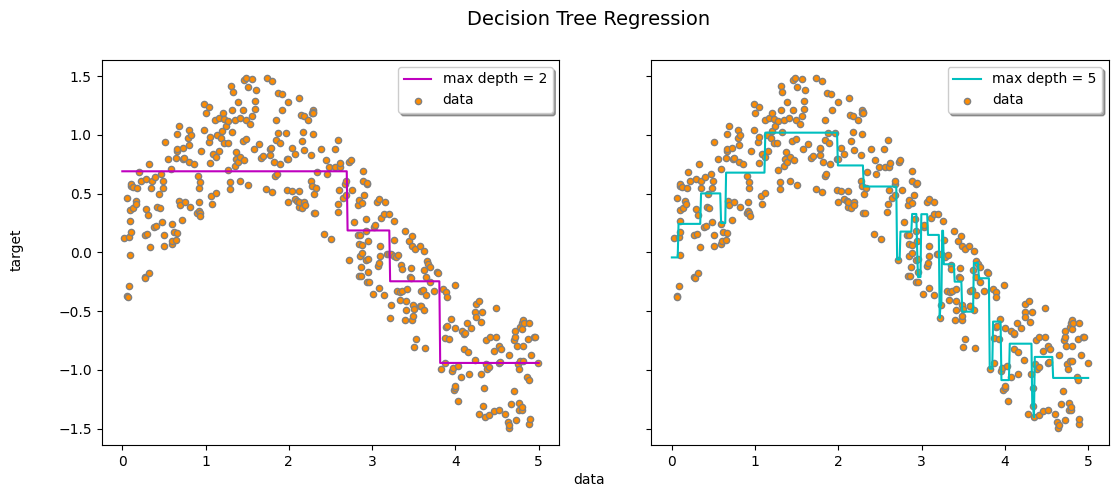

In [55]:
# X_test값을 생성하여 결정트리 예측결과를 시각화해보자

regrs = [regr_1, regr_2]
depths = ['max depth = 2', 'max depth = 5']
model_color = ['m', 'c']

fig, axes = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (13,5))
for ix, regr in enumerate(regrs):
  pred = regr.predict(T)
  axes[ix].plot(T, pred, color = model_color[ix], label = depths[ix])
  axes[ix].scatter(X, y, s = 20, edgecolor = 'gray', c = 'darkorange', label = 'data')
  axes[ix].legend(fancybox = True, shadow = True)

fig.text(0.5, 0.04, 'data', ha = 'center', va = 'center')
fig.text(0.06, 0.5, 'target', ha = 'center', va = 'center', rotation = 'vertical')
fig.suptitle("Decision Tree Regression", fontsize = 14)
plt.show()